In [1]:
%matplotlib inline

import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib import animation
#import seaborn as sns


The definition for the circle on a phase plot is $ x^2 + y^2 = 1 $

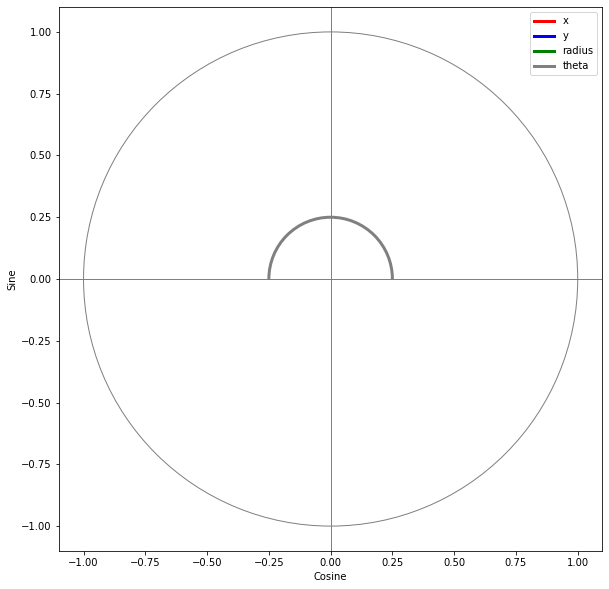

In [2]:
# create a figure and axes
x_limits = (-1.1, 1.1)
y_limits = (-1.1, 1.1)

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(x_limits)
ax1.set_ylim(y_limits)
ax1.set_xlabel('Cosine')
ax1.set_ylabel('Sine')

circle_origin = (0,0)
circle_radius = 1

circle = plt.Circle( circle_origin, circle_radius, fill = False, color = "gray" )
ax1.set_aspect( 1 ) # force circle despite plot size
ax1.add_artist( circle )

arc = mpatches.Arc([0, 0], 0.5, 0.5, 0, theta1=0, theta2=180, lw=3, edgecolor="grey")
plt.gca().add_patch(arc)

# These are to be updated
txt_title = ax1.set_title('')
cos_line, = ax1.plot([], [], label='x', color="red", lw=3)
sin_line, = ax1.plot([], [], label='y', color="blue", lw=3)
radius_line, = ax1.plot([], [], label='r', color="green", lw=3)
_, = ax1.plot([],[], color="grey", lw=3) #This needs to be defined so the arc has a legend
point, = ax1.plot([], [], 'g.', ms=2)

ax1.legend(['x','y', 'radius', 'theta']);

ax1.plot([x_limits[0],x_limits[1]], [0,0], color="grey", lw=1)
ax1.plot([0,0], [y_limits[0],y_limits[1]], color="grey", lw=1)

$ \sin \theta = \frac{y}{r} $

$ \cos \theta = \frac{x}{r} $


It seems there's no nice way to do find the inverse sine and cosine methods.
https://math.stackexchange.com/questions/1160996/how-to-find-the-inverse-cosine-without-a-calculator?rq=1

This will need to use the numpy definitions

In [3]:
def drawframe(n, *fargs):
    theta = n
    radians = np.deg2rad(theta)
    pt_x = np.cos(radians)
    pt_y = np.sin(radians)
    
    sin_line.set_data([pt_x, pt_x], [0, pt_y])
    cos_line.set_data([pt_x, 0], [pt_y, pt_y])
    radius_line.set_data([0, pt_x], [0, pt_y])
    
    arc.theta2 = theta
    
    point.set_data(pt_x,pt_y)
    txt_title.set_text('radius = {0} \n x = {1:.3f} \n y = {2:.3f} \n theta = {3} \n radians = {4:.3f}'.format(1,pt_x,pt_y,theta, radians))
    return (cos_line, sin_line)

In [4]:
# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=360, interval=100, blit=True)

In [9]:
from IPython.display import HTML 
import subprocess
writervideo = animation.FFMpegWriter(fps=60)
anim.save('unitCircle.mp4', writer=writervideo)

subprocess.run(["ffmpeg", "-i", "unitCircle.mp4", "unitCircle.gif"])

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

CompletedProcess(args=['ffmpeg', '-i', 'unitCircle.mp4', 'unitCircle.gif'], returncode=0)

![gif of output unit circle](unitCircle.gif)